In [55]:
import pandas as pd 

In [56]:
insurance = pd.read_csv("insurance.csv")

In [57]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Distribution should be normal for linear regression  

<AxesSubplot:>

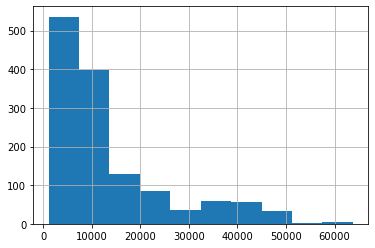

In [58]:
insurance["charges"].hist()

In [59]:
import numpy as np
insurance["log_charges"] = np.log2(insurance["charges"])

In [60]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448
1,18,male,33.770,1,no,southeast,1725.55230,10.752842
2,28,male,33.000,3,no,southeast,4449.46200,12.119415
3,33,male,22.705,0,no,northwest,21984.47061,14.424197
4,32,male,28.880,0,no,northwest,3866.85520,11.916945


<AxesSubplot:>

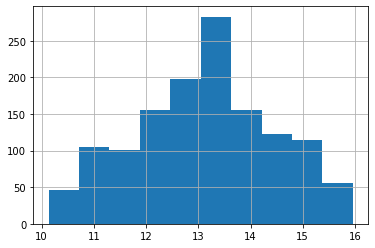

In [61]:
insurance["log_charges"].hist()

In [62]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   log_charges  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [63]:
 numeric_data = insurance.select_dtypes(np.number)

In [64]:
numeric_data.head()

,age,bmi,children,charges,log_charges
0,19,27.900,0,16884.92400,14.043448
1,18,33.770,1,1725.55230,10.752842
2,28,33.000,3,4449.46200,12.119415
3,33,22.705,0,21984.47061,14.424197
4,32,28.880,0,3866.85520,11.916945


In [65]:
numeric_data.corr()

,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


In [66]:
corr_data = numeric_data.corr()

In [67]:
corr_data["log_charges"]

age            0.527834
bmi            0.132669
children       0.161336
charges        0.892964
log_charges    1.000000
Name: log_charges, dtype: float64

In [68]:
predictors = ["age", "bmi"]

In [69]:
catago_data = insurance.select_dtypes("O")

In [70]:
catago_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


<AxesSubplot:title={'center':'log_charges'}, xlabel='sex'>

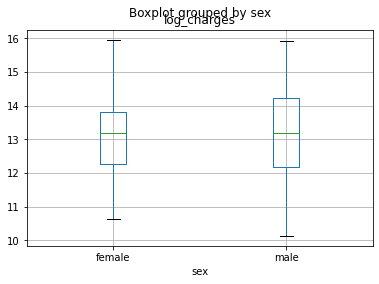

In [71]:
insurance.boxplot("log_charges", by ="sex")

<AxesSubplot:title={'center':'log_charges'}, xlabel='smoker'>

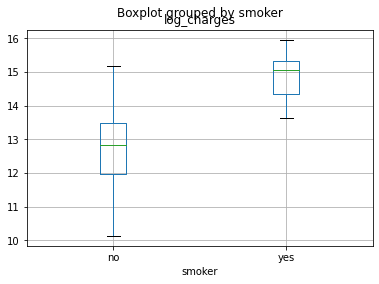

In [72]:
insurance.boxplot("log_charges", by ="smoker")

<AxesSubplot:title={'center':'log_charges'}, xlabel='region'>

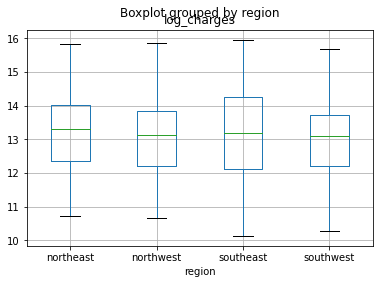

In [73]:
insurance.boxplot("log_charges", by ="region")

In [74]:
predictors

['age', 'bmi']

In [75]:
predictors.append("smoker")

In [76]:
insurance["is_smoker"] = insurance.smoker == 'yes'

In [77]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448,True
1,18,male,33.770,1,no,southeast,1725.55230,10.752842,False
2,28,male,33.000,3,no,southeast,4449.46200,12.119415,False
3,33,male,22.705,0,no,northwest,21984.47061,14.424197,False
4,32,male,28.880,0,no,northwest,3866.85520,11.916945,False


In [78]:
predictors.append("is_smoker")

In [79]:
predictors

['age', 'bmi', 'smoker', 'is_smoker']

In [80]:
predictors.remove("smoker")

In [81]:
predictors

['age', 'bmi', 'is_smoker']

In [82]:
x = insurance[predictors]

In [83]:
y = insurance["log_charges"]

In [84]:
x

,age,bmi,is_smoker
0,19,27.900,True
1,18,33.770,False
2,28,33.000,False
3,33,22.705,False
4,32,28.880,False
...,...,...,...
1333,50,30.970,False
1334,18,31.920,False
1335,18,36.850,False
1336,21,25.800,False


In [85]:
y

0       14.043448
1       10.752842
2       12.119415
3       14.424197
4       11.916945
          ...    
1333    13.371851
1334    11.107205
1335    10.670509
1336    10.971504
1337    14.830781
Name: log_charges, Length: 1338, dtype: float64

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1)

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
insurance_model = LinearRegression()

In [90]:
insurance_model.fit(x_train,y_train)

LinearRegression()

In [91]:
insurance_model.coef_

array([0.04892865, 0.01523672, 2.23063344])

In [92]:
insurance_model.intercept_

10.29374135667316

In [93]:
y_predict_train = insurance_model.predict(x_train)
y_predict_train

array([12.05685083, 11.71351229, 12.91324621, ..., 15.5524115 ,
       14.82008058, 13.50838817])

In [94]:
y_predict_test = insurance_model.predict(x_test)
y_predict_test

array([11.76474629, 13.56324036, 13.35286097, 13.24936609, 11.66102179,
       14.56515364, 13.2627744 , 13.46943958, 12.01142663, 14.73698413,
       13.6032169 , 13.64744309, 12.6947141 , 12.79060939, 11.69905726,
       13.10246534, 12.25433642, 12.42830113, 13.73697652, 13.83317655,
       13.34465192, 14.5872281 , 12.96712571, 13.14547044, 11.63331081,
       12.7326149 , 12.81454982, 13.15015627, 12.40967478, 12.14952764,
       13.57922014, 12.36870678, 15.46209531, 13.94037518, 15.26681905,
       13.25751666, 14.5300904 , 13.94346007, 13.72659677, 15.19080767,
       12.16655522, 13.65559366, 13.16421161, 13.74581382, 12.17011599,
       13.66515416, 11.81032286, 14.37707618, 13.06412513, 13.5212632 ,
       13.75941205, 13.4373475 , 11.82845348, 12.88711416, 13.82196709,
       12.5332258 , 15.1244142 , 13.76426903, 11.78820977, 11.82978831,
       12.25403276, 13.78935221, 14.08382782, 11.84755679, 13.79253314,
       13.13446245, 13.12838654, 13.44805076, 11.59828513, 14.01

In [95]:
from sklearn.metrics import mean_squared_error ,r2_score

In [96]:
mse_train = mean_squared_error(y_train,y_predict_train)
mse_train

0.45466653392706446

In [97]:
mse_test = mean_squared_error(y_test,y_predict_test)
mse_test

0.43553508753082093

In [98]:
r2_score(y_train,y_predict_train)

0.7421118855283421

In [99]:
r2_score(y_test,y_predict_test)

0.7502277830580026

In [103]:
residual = y_train - y_predict_train
residual.sum().round()

0.0

In [105]:
import matplotlib.pyplot as plt

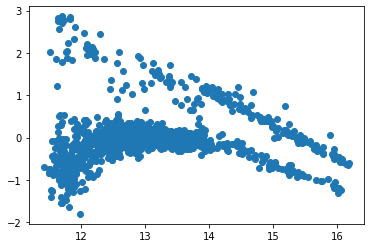

In [106]:
plt.scatter(y_predict_train,residual)